In [1]:
import torchvision
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as functional

In [28]:
%matplotlib inline
plt.style.use("dark_background")

In [3]:
from convolutional_autoencoder import DataProvider, AutoEncoder

DataProvider??

In [4]:
data_provider = DataProvider(root_dir="/data/downloaded", batch_size=20, num_workers=6)

In [5]:
test_loader = data_provider.test

In [6]:
sample, target = iter(test_loader).next()

In [7]:
image_grid = torchvision.utils.make_grid(sample, nrow=10).permute(1, 2, 0)

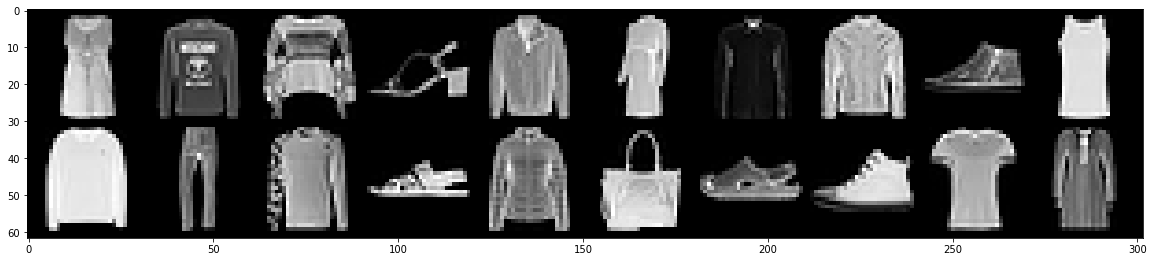

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.imshow(image_grid)
plt.savefig("conv-autoencoder-1.png")
plt.show()

In [10]:
model_path = "/home/ksharma/tmp/fmnist_autoencoder.pt"
auto_encoder = AutoEncoder()
auto_encoder.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [11]:
auto_encoder.eval()

AutoEncoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
  )
)

In [12]:
data_iter = iter(data_provider.test)

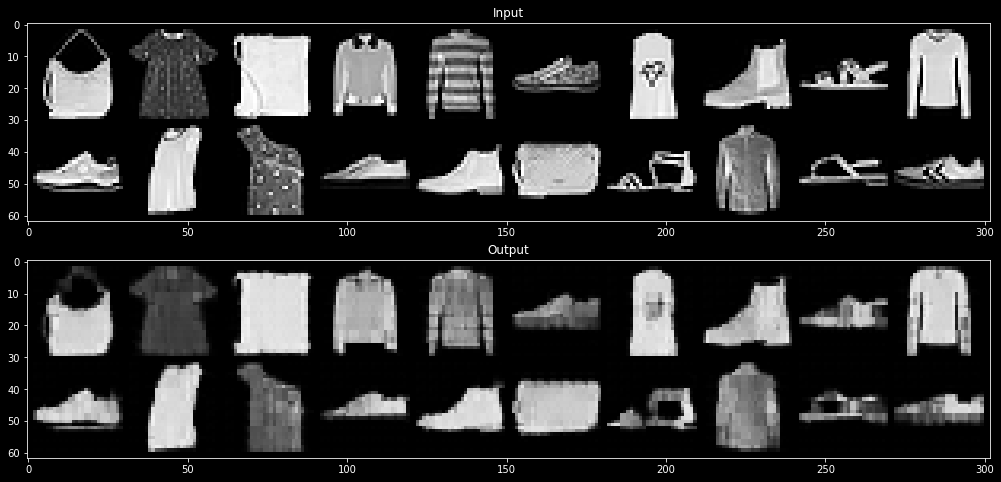

In [30]:

test_image, target = data_iter.next()
output_image = auto_encoder(test_image)
grid_input, grid_output = torchvision.utils.make_grid(test_image, nrow=10).permute(1, 2, 0), torchvision.utils.make_grid(output_image, nrow=10).permute(1, 2, 0)
fig, ax = plt.subplots(figsize=(20, 8), nrows=2)
ax[0].imshow(grid_input)
ax[1].imshow(grid_output)
ax[0].set_title("Input")
ax[1].set_title("Output")
plt.savefig("conv-autoencoder-4.png")
plt.show()